# Open Ocean
# Open Earth Fundation
---------------------------------------------------------------------------------------------------------------------

## Physical habitat types

Depth-defined marine ecological habitats
- epipelagic: 0-200m
- mesopelagic: 200-1000m
- bathypelagic: 1000-4000m
- abyssipelagic: 4000-6000m

---------------------------------------------------------------------------------------------------------------------

Data downloaded from https://download.gebco.net/

The file can be found on in the `Bathymetry_Data` in our Shared Drive `to download for gh` as `ACMC_Bathymetry.nc`

---------------------------------------------------------------------------------------------------------------------

In [95]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import geopandas as gpd
from matplotlib.ticker import LinearLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
fname = "../to download for gh/Bathymetry_Data/ACMC_Bathymetry.nc"

---------------------------------------------------------------------------------------------------------------------
Inspect the netCDF4 file.

---------------------------------------------------------------------------------------------------------------------

In [3]:
fh = Dataset(fname, 'r')

---------------------------------------------------------------------------------------------------------------------
Look into variables information.

---------------------------------------------------------------------------------------------------------------------

In [6]:
fh.variables

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
     sdn_parameter_urn: SDN:P01::ALATZZ01
     sdn_parameter_name: Latitude north
     sdn_uom_urn: SDN:P06::DEGN
     sdn_uom_name: Degrees north
 unlimited dimensions: 
 current shape = (1680,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(lon)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
     sdn_parameter_urn: SDN:P01::ALONZZ01
     sdn_parameter_name: Longitude east
     sdn_uom_urn: SDN:P06::DEGE
     sdn_uom_name: Degrees east
 unlimited dimensions: 
 current shape = (1200,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'elevation': <class 'netCDF4._netCDF4.Variable'>
 int16 elevation(lat, lon)
     standard_name: height_above_mean_sea_level
     long_name: Elevation relative to sea level

---------------------------------------------------------------------------------------------------------------------
Import the specific variables.

---------------------------------------------------------------------------------------------------------------------

In [47]:
z = fh.variables["elevation"][:].data
lon = fh.variables["lon"][:].data
lat = fh.variables["lat"][:].data

---------------------------------------------------------------------------------------------------------------------
Grid longitude and latitude for pcolor plot.

---------------------------------------------------------------------------------------------------------------------

In [48]:
Lon, Lat = np.meshgrid(lon, lat)

---------------------------------------------------------------------------------------------------------------------
Filter for the first marine ecological habitats: `epipelagic`

---------------------------------------------------------------------------------------------------------------------

In [78]:
epipe = np.multiply(z,np.multiply(z<=0, z>-200))
epipelagic = np.where(epipe==0, np.nan, epipe)

---------------------------------------------------------------------------------------------------------------------
Check the shape of arrays

---------------------------------------------------------------------------------------------------------------------

In [50]:
print(np.shape(z))
print(np.shape(epipe))
print(np.shape(epipelagic))

(1680, 1200)
(1680, 1200)
(1680, 1200)


Let's do the same for the others marine ecological habitats

---------------------------------------------------------------------------------------------------------------------
`mesopelagic`

---------------------------------------------------------------------------------------------------------------------

In [82]:
meso = np.multiply(z,np.multiply(z<=-200, z>-1000))
mesopelagic = np.where(meso==0, np.nan, meso)

---------------------------------------------------------------------------------------------------------------------
`bathypelagic`

---------------------------------------------------------------------------------------------------------------------

In [83]:
bathy = np.multiply(z,np.multiply(z<=-1000, z>-4000))
bathypelagic = np.where(bathy==0, np.nan, bathy)

---------------------------------------------------------------------------------------------------------------------
`abyssopelagic`

---------------------------------------------------------------------------------------------------------------------

In [84]:
abysso = np.multiply(z,np.multiply(z<=-4000, z>-6000))
abyssopelagic = np.where(abysso==0, np.nan, abysso)

## Plots

---------------------------------------------------------------------------------------------------------------------
First import the countries info from geopandas.

---------------------------------------------------------------------------------------------------------------------

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

---------------------------------------------------------------------------------------------------------------------
Import the AMMB boundary file.

---------------------------------------------------------------------------------------------------------------------

In [19]:
ACMC = gpd.read_file("../to download for gh/geospatial_input/ACMC.shp")

<AxesSubplot:>

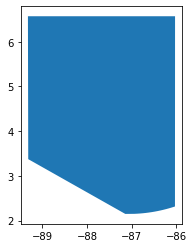

In [20]:
ACMC.plot()

Text(1.0, 1.0, 'ACMC')

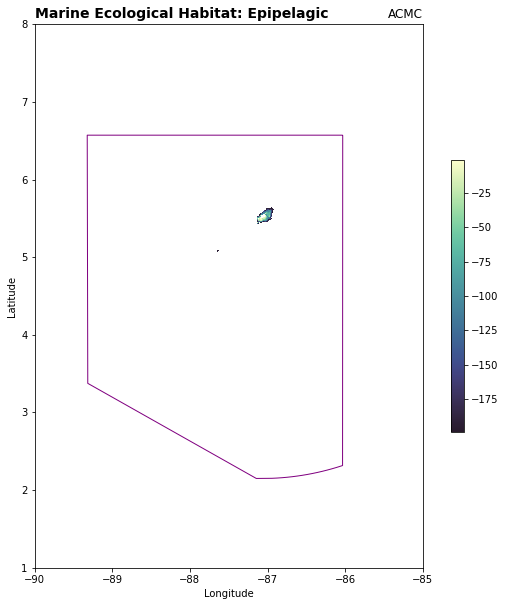

In [90]:
fig, ax = plt.subplots(figsize=(10,10))

pcol = ax.pcolor(Lon, Lat, epipelagic, cmap = cmocean.cm.deep_r);
cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

ACMC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlabel("Longitude");
ax.set_ylabel("Latitude");
ax.set_aspect('equal')
ax.set_title('Marine Ecological Habitat: Epipelagic', fontweight='bold', fontsize=14, loc='left')
ax.set_title('ACMC', fontsize=12, loc='right')

Text(1.0, 1.0, 'ACMC')

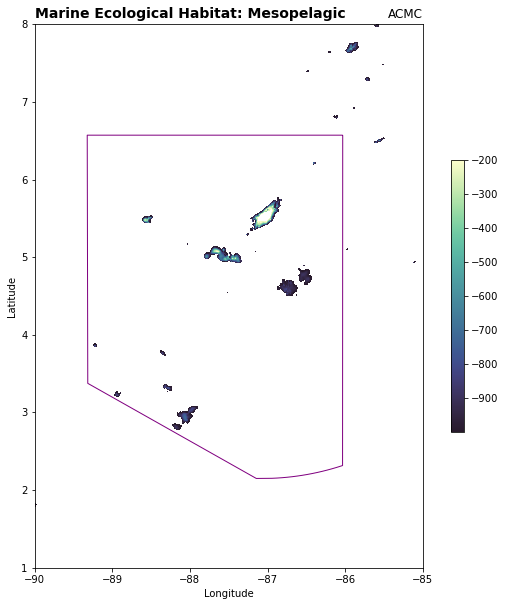

In [89]:
fig, ax = plt.subplots(figsize=(10,10))

pcol = ax.pcolor(Lon, Lat, mesopelagic, cmap = cmocean.cm.deep_r);
cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

ACMC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlabel("Longitude");
ax.set_ylabel("Latitude");
ax.set_aspect('equal')
ax.set_title('Marine Ecological Habitat: Mesopelagic', fontweight='bold', fontsize=14, loc='left')
ax.set_title('ACMC', fontsize=12, loc='right')

Text(1.0, 1.0, 'ACMC')

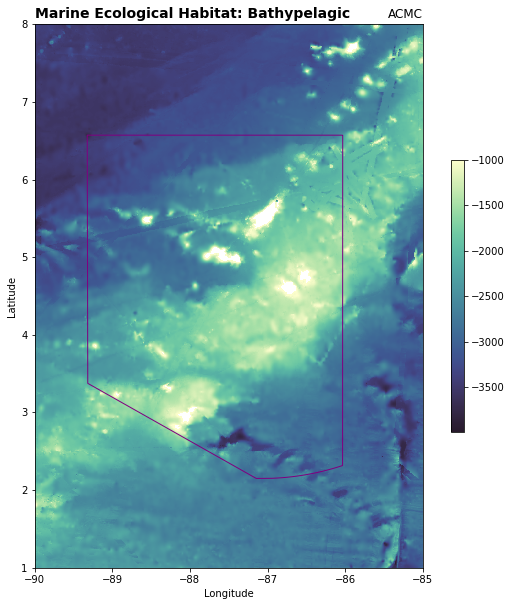

In [88]:
fig, ax = plt.subplots(figsize=(10,10))

pcol = ax.pcolor(Lon, Lat, bathypelagic, cmap = cmocean.cm.deep_r);
cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

ACMC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlabel("Longitude");
ax.set_ylabel("Latitude");
ax.set_aspect('equal')
ax.set_title('Marine Ecological Habitat: Bathypelagic', fontweight='bold', fontsize=14, loc='left')
ax.set_title('ACMC', fontsize=12, loc='right')

Text(1.0, 1.0, 'ACMC')

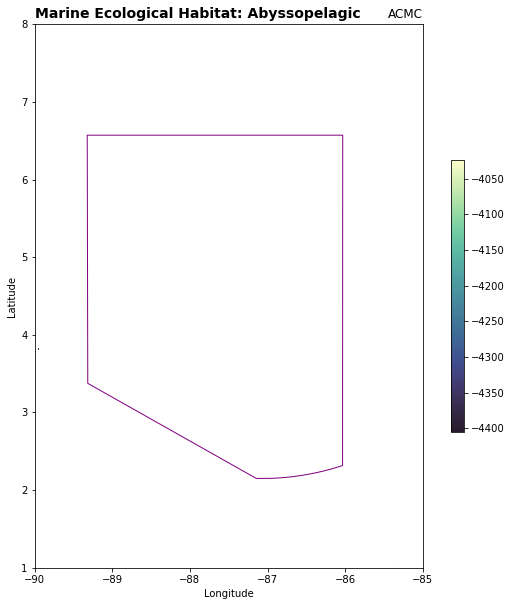

In [91]:
fig, ax = plt.subplots(figsize=(10,10))

pcol = ax.pcolor(Lon, Lat, abyssopelagic, cmap = cmocean.cm.deep_r);
cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

ACMC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlabel("Longitude");
ax.set_ylabel("Latitude");
ax.set_aspect('equal')
ax.set_title('Marine Ecological Habitat: Abyssopelagic', fontweight='bold', fontsize=14, loc='left')
ax.set_title('ACMC', fontsize=12, loc='right')

<IPython.core.display.Javascript object>


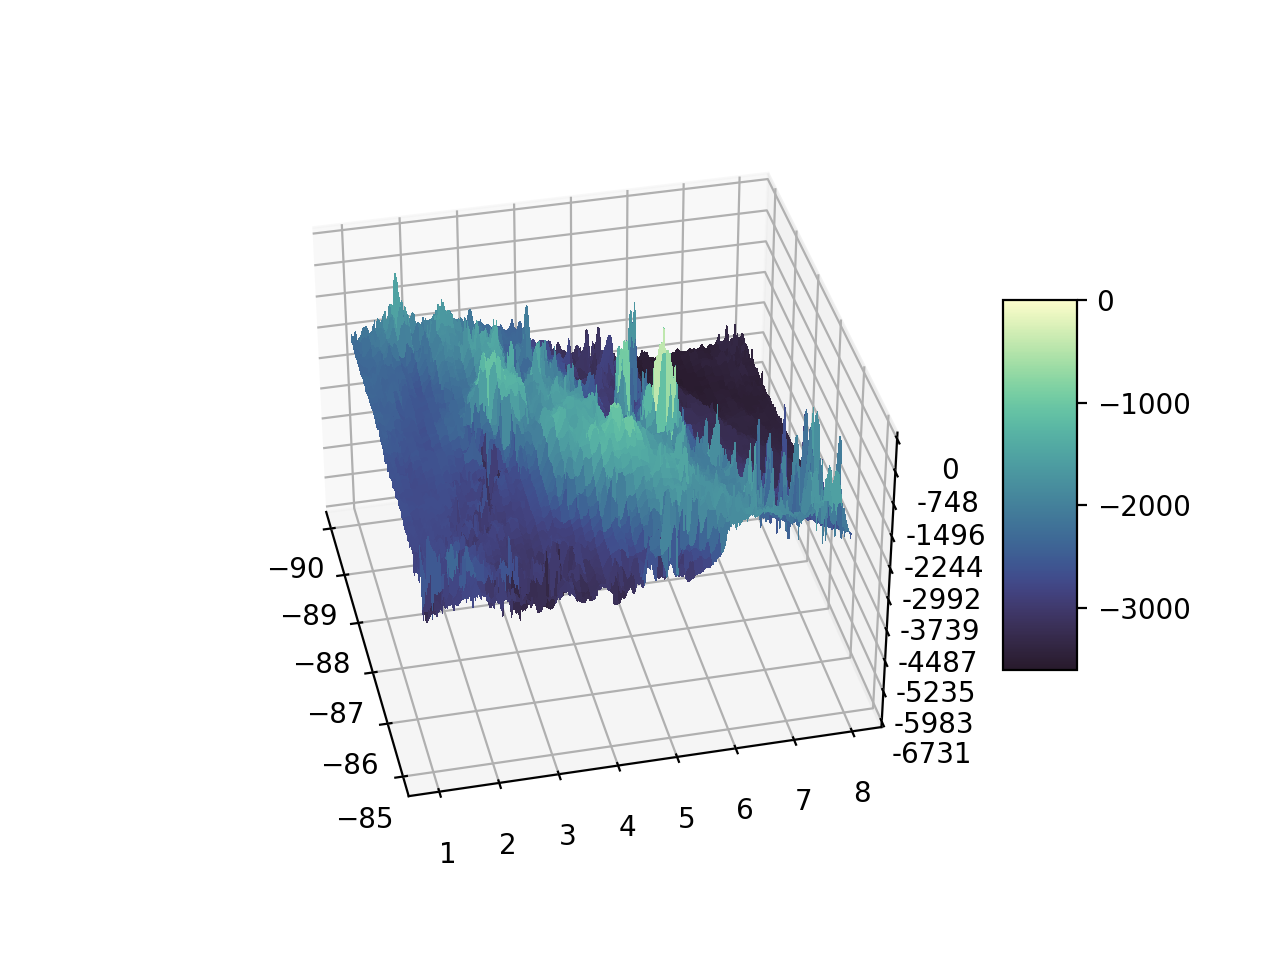

In [96]:
%matplotlib notebook

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(Lon, Lat, z, cmap=cmocean.cm.deep_r,
                       linewidth=0, antialiased=False, vmax = 0)

# Customize the z axis.
ax.set_zlim(-6731, 0)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.00f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()